In [2]:
import pandas as pd
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Importing the Dataset

kpiName = 'MoU Overall'
circleName = 'MAHARASHTRA'
howIndiaTalksDf = pd.read_csv('C:/Users/piyush12.kumar/PycharmProjects/fileRead/foreCasting/how_india_talks_[2019-11-01, 2020-02-23].csv')
howIndiaTalksDf = howIndiaTalksDf.loc[howIndiaTalksDf['CIRCLE'] == circleName]
howIndiaTalksDf[['First', 'Last']] = howIndiaTalksDf.TIME_STAMP.str.split(" ", expand=True, )
howIndiaTalksDf = howIndiaTalksDf.loc[howIndiaTalksDf['Last'] == "16"]
data = howIndiaTalksDf[['TIME_STAMP', kpiName]]
data.head()

,TIME_STAMP,MoU Overall
380,2019-11-01 16,36557861.15
932,2019-11-02 16,36197072.99
1484,2019-11-03 16,33305300.94
2036,2019-11-04 16,37308981.02
2588,2019-11-05 16,37237728.36


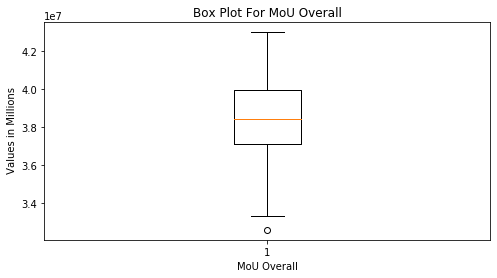

TIME_STAMP
2019-11-01 16    36557861.15
2019-11-02 16    36197072.99
2019-11-03 16    33305300.94
2019-11-04 16    37308981.02
2019-11-05 16    37237728.36
Name: MoU_Overall, dtype: float64

In [3]:
data.columns = [c.replace(' ', '_') for c in data.columns]
plt.figure(figsize=(8,4))
plt.boxplot(data.MoU_Overall)
plt.title('Box Plot For MoU Overall')
plt.xlabel('MoU Overall')
plt.ylabel(' Values in Millions')
plt.show()
dates = pd.date_range(start='2019-11-01 16:00:00', freq='D', periods=len(data))
dates[0:5]
data.set_index('TIME_STAMP',inplace=True)
data.head()
mou_ts = data['MoU_Overall']
mou_ts[0:5]


In [4]:
# Modeling
data = pd.DataFrame(mou_ts.copy())
data.head()

,MoU_Overall
TIME_STAMP,
2019-11-01 16,36557861.15
2019-11-02 16,36197072.99
2019-11-03 16,33305300.94
2019-11-04 16,37308981.02
2019-11-05 16,37237728.36


In [5]:
# Splitting Train and Test Length
train_len = int(np.ceil(len(data) * 0.75))
train=data[0:train_len] 
test=data[train_len:]
print('Train data length :',len(train))
print('Test  data length :',len(test))
x_train = train.drop('MoU_Overall', axis=1)
x_test = test.drop('MoU_Overall', axis=1)
y_train = train[['MoU_Overall']]
y_test = test[['MoU_Overall']]

Train data length : 87
Test  data length : 28


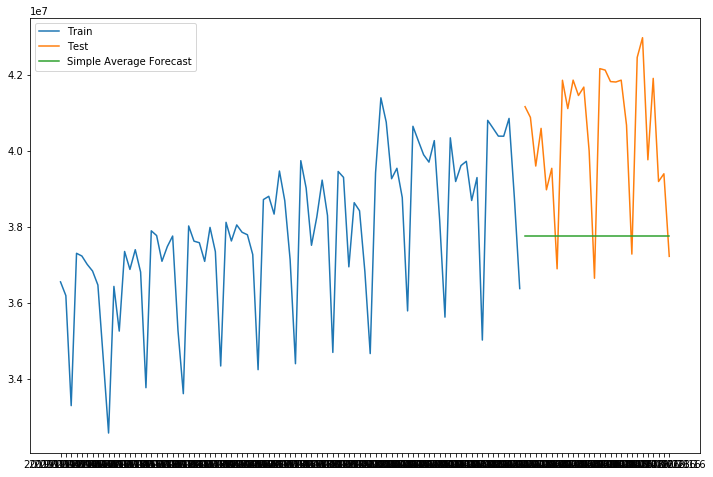

In [6]:
# 1. Simple Average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['MoU_Overall'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.show()

In [7]:
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.avg_forecast)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
resultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'RMSE': [rmse]})
resultsDf

,Method,RMSE
0,Simple average forecast,3210437.494


In [8]:
# Storing results in a dataframe
resultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,3210437.494,0.0705


In [10]:
# Model 2: Moving Average(MA)
df1 = data.copy()
# Grid Search to determine the best rolling window
for i in range(1,31):
    df1['moving_avg_forecast'] = data['MoU_Overall'].rolling(i).mean()
    train=df1[0:train_len] 
    test=df1[train_len:]
    y_hat_avg = test.copy()
    rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.moving_avg_forecast))
    abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.moving_avg_forecast)
    actual = y_test['MoU_Overall']
    mape = np.round(np.mean(abs_error/actual),4)
    print('Rolling window : ',i,'RMSE : ' ,np.round(rmse,2) ,'MAPE : ',mape)

Rolling window :  1 RMSE :  0.0 MAPE :  0.0
Rolling window :  2 RMSE :  1241483.54 MAPE :  0.0226
Rolling window :  3 RMSE :  1496429.88 MAPE :  0.0297
Rolling window :  4 RMSE :  1590294.85 MAPE :  0.032
Rolling window :  5 RMSE :  1660750.41 MAPE :  0.0359
Rolling window :  6 RMSE :  1708317.89 MAPE :  0.0373
Rolling window :  7 RMSE :  1702263.88 MAPE :  0.0354
Rolling window :  8 RMSE :  1547347.25 MAPE :  0.0329
Rolling window :  9 RMSE :  1602006.51 MAPE :  0.0342
Rolling window :  10 RMSE :  1688420.72 MAPE :  0.0364
Rolling window :  11 RMSE :  1729297.96 MAPE :  0.0369
Rolling window :  12 RMSE :  1776690.29 MAPE :  0.0387
Rolling window :  13 RMSE :  1796081.71 MAPE :  0.0393
Rolling window :  14 RMSE :  1801346.16 MAPE :  0.0385
Rolling window :  15 RMSE :  1718835.45 MAPE :  0.037
Rolling window :  16 RMSE :  1741751.32 MAPE :  0.0376
Rolling window :  17 RMSE :  1786020.94 MAPE :  0.0387
Rolling window :  18 RMSE :  1812437.47 MAPE :  0.0393
Rolling window :  19 RMSE :  18

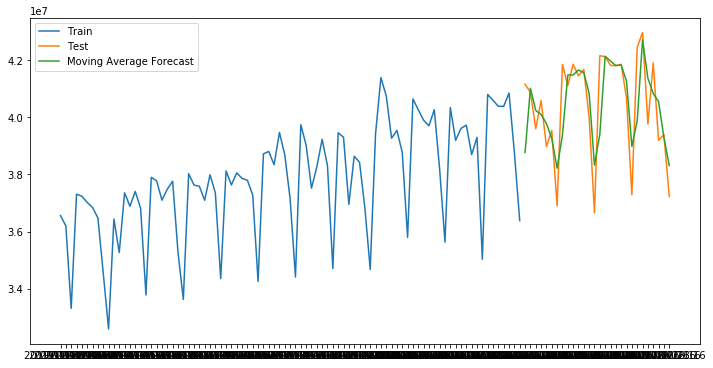

In [11]:
# Choosing rolling window as 2 since it gives the less MAPE score
df1['moving_avg_forecast'] = data['MoU_Overall'].rolling(2).mean()
#Creating train and test set 
train=df1[0:train_len] 
test=df1[train_len:]
y_hat_avg = test.copy()
plt.figure(figsize=(12,6))
plt.plot(train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [13]:
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.moving_avg_forecast)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,3210437.494,0.0705
0,Moving average forecast,1241483.538,0.0226


In [15]:
# Model 3: Simple Exponential Smoothing
# create class
model = SimpleExpSmoothing(train['MoU_Overall'])
# Grid Search to acquire best Smoothing_level(alpha)
for i in np.arange(0.1,1,0.1):
    model_fit = model.fit(smoothing_level=i,optimized=False)
    y_hat_avg = test.copy()
    y_hat_avg['SES'] = model_fit.forecast(len(test['MoU_Overall']))
    rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.SES))
    rmse = round(rmse, 3)
    abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.SES)
    actual = y_test['MoU_Overall']
    mape = np.round(np.mean(abs_error/actual),4)
    print('smoothing_level : ',np.round(i,1),'RMSE : ' ,np.round(rmse,2) ,'MAPE : ',mape)

smoothing_level :  0.1 RMSE :  2244853.92 MAPE :  0.0487
smoothing_level :  0.2 RMSE :  2289860.63 MAPE :  0.0498
smoothing_level :  0.3 RMSE :  2460039.9 MAPE :  0.0541
smoothing_level :  0.4 RMSE :  2709122.53 MAPE :  0.0598
smoothing_level :  0.5 RMSE :  3007985.32 MAPE :  0.0663
smoothing_level :  0.6 RMSE :  3326247.6 MAPE :  0.0728
smoothing_level :  0.7 RMSE :  3640451.72 MAPE :  0.0791
smoothing_level :  0.8 RMSE :  3935986.06 MAPE :  0.0859
smoothing_level :  0.9 RMSE :  4204582.73 MAPE :  0.0927


In [16]:
# alpha = 0.1 gives us the good MAPE score so we fit the model with 0.2

# fit model
model_fit = model.fit(smoothing_level=0.1,optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 36557861.15000001,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

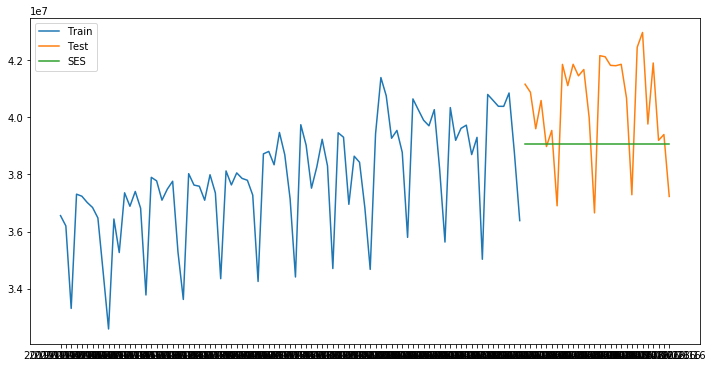

In [17]:
y_hat_avg = test.copy()
y_hat_avg['SES'] = model_fit.forecast(len(test['MoU_Overall']))
plt.figure(figsize=(12,6))
plt.plot(train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [18]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.SES))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.SES)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,3210437.494,0.0705
0,Moving average forecast,1241483.538,0.0226
0,SES forecast,2244853.925,0.0487


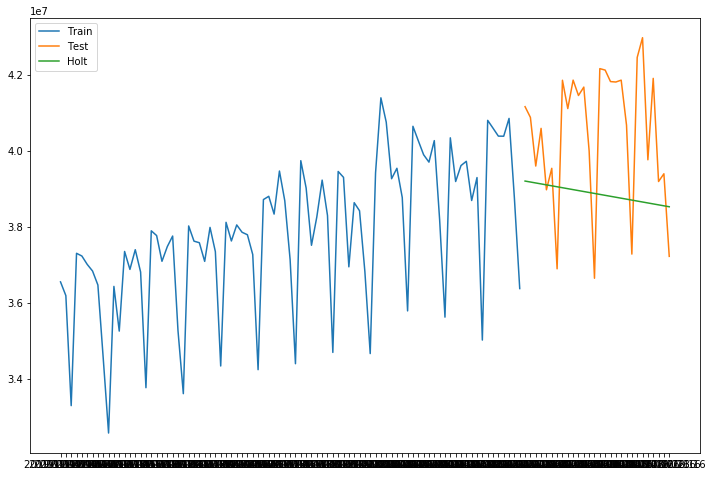

In [20]:
# Model 4 :Holts Method
fit1 = ExponentialSmoothing(np.asarray(train['MoU_Overall']) ,seasonal_periods=7 ,trend='add', seasonal='None').fit()
fit1.params

y_hat_avg['Holt'] = fit1.forecast(len(test))
plt.figure(figsize=(12,8))
plt.plot( train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')
plt.show()

In [21]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.Holt))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.Holt)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,3210437.494,0.0705
0,Moving average forecast,1241483.538,0.0226
0,SES forecast,2244853.925,0.0487
0,Holt,2374251.599,0.0515


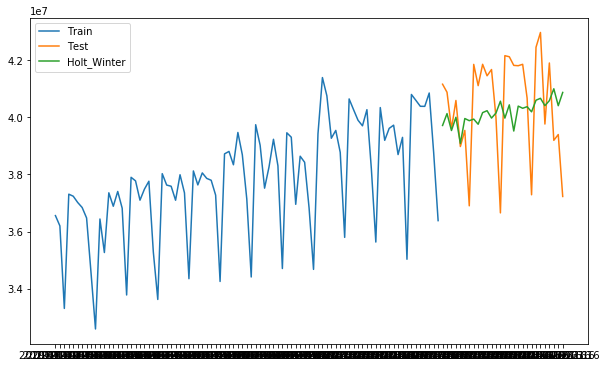

In [22]:
# Model 5 : Holt-Winters Method - Additive
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['MoU_Overall']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [23]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.Holt_Winter)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf


,Method,RMSE,MAPE
0,Simple average forecast,3210437.494,0.0705
0,Moving average forecast,1241483.538,0.0226
0,SES forecast,2244853.925,0.0487
0,Holt,2374251.599,0.0515
0,Holt Winter forecast - Additive,1837297.946,0.0386


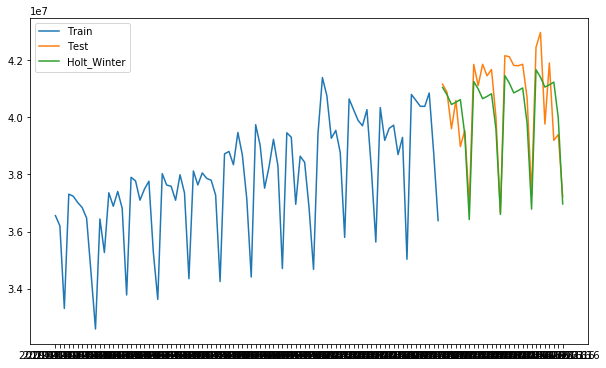

In [25]:
# Model 6 : Holt-Winters Method - Multiplicative
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['MoU_Overall']) ,seasonal_periods=7 ,trend='add', seasonal='mul').fit()
fit1.params

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['MoU_Overall'], label='Train')
plt.plot(test['MoU_Overall'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [26]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.MoU_Overall, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['MoU_Overall']-y_hat_avg.Holt_Winter)
actual = y_test['MoU_Overall']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Multiplicative'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,3210437.494,0.0705
1,Moving average forecast,1241483.538,0.0226
2,SES forecast,2244853.925,0.0487
3,Holt,2374251.599,0.0515
4,Holt Winter forecast - Additive,1837297.946,0.0386
5,Holt Winter forecast - Multiplicative,878693.558,0.0178


Inference:
Simple Average Model - It takes the overall average of the past data and applied it as prediction. Though it gives us the good mape score than linear regression it is Not applicable for all the cases.
Moving Average Model - Since it captures the moving average in this case it is 2(Rolling Window). It captured the seasonality and gave better results.
Simple ES Model - It uses exponentially decreasing weight for past data . it is same like simple average except than smoothing(rate data at prior steps decay exponentially). But it works well with stationary data.
Holt Model - It captures the trend alone , as we can see the data has seasonality too. So it has performance is not up to the mark.
Holt Winter Model - It captures both Trend and Seasonality hence it performed well among all the models.Both the Mape score and RMSE score are significantly less when compared with other models
